# Replicability of structure-based multivariate BWAS - figures

Plots from this notebook are saved into the directory 'fig'.

### Imports

In [20]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(3, 3)})
sns.set_style("white")

# Define Plotting function
This function takes a dataframe created in the notebook `multivariate_BWAS_replicability_analysis.ipynb`
and recreates the "Replication plots" from the target paper (Fig.4) for a given target variable and feature set.

In [21]:
def plot(target, feature, df, alpha=0.05, cv_only=True, filetag=None, ylim=None, xlim=None):
    sns.set(rc={"figure.figsize":(3, 3)})
    sns.set_style("white")
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp = tmp.dropna()
    if not cv_only:
        sns.scatterplot(x='r_replication', y='r_discovery_overfit', hue='n', data=tmp, palette='Greens_r', linewidth=0, hue_norm=(0,tmp.n.max()*1.5))
        sns.scatterplot(x=[tmp.loc[tmp.n==200, 'r_replication'].mean()], y=[tmp.loc[tmp.n==200, 'r_discovery_overfit'].mean()], color='red')
        sns.scatterplot(x=[tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()], y=[tmp.loc[tmp.n==tmp.n.max(), 'r_discovery_overfit'].mean()], color='purple').set(title='Discovery without CV (overfit)')
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.axhline(0.088, linestyle='dotted')
        plt.axvline(0.088, linestyle='dotted')
        plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
        if ylim:
            plt.ylim(ylim)
        if xlim:
            plt.xlim(xlim)
        sns.despine()
        if filetag:
            plt.savefig('fig/overfit_scatter_' + target + '_' + feature + '_' + filetag + '.pdf')
        plt.show()

        for n in tmp.n.unique():
            tmp2 = tmp[tmp.n == n]

            if (tmp2['p_discovery_overfit']<alpha).sum() == 0:
                replication_prob = 'no discovery'
            else:
                 #      #(significant replications among significant discoveries)     / # significant discoveries
                replication_prob = (tmp2.loc[tmp2['p_discovery_overfit']<alpha,'p_replication']<alpha).sum() / (tmp2['p_discovery_overfit']<alpha).sum() * 100
                print("Replication probability at n =", n, ':', replication_prob, '%')
        
    sns.scatterplot(x='r_replication', y='r_discovery_cv', hue='n', data=tmp, palette='Greens_r', linewidth=0, hue_norm=(0,tmp.n.max()*1.5))
    sns.scatterplot(x=[tmp.loc[tmp.n==200, 'r_replication'].mean()], y=[tmp.loc[tmp.n==200, 'r_discovery_cv'].mean()], color='red')
    sns.scatterplot(x=[tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()], y=[tmp.loc[tmp.n==tmp.n.max(), 'r_discovery_cv'].mean()], color='purple').set(title='Discovery with CV')
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    plt.axhline(0.088, linestyle='dotted')
    plt.axvline(0.088, linestyle='dotted')
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    sns.despine()
    if filetag:
        plt.savefig('fig/scatter_' + target + '_' + feature + '_' + filetag + '.pdf')
    plt.show()

    for n in tmp.n.unique():
        tmp2 = tmp[tmp.n == n]

        if (tmp2['p_discovery_cv']<alpha).sum() == 0:
            replication_prob = 'no discovery'
        else:
             #      #(significant replications among significant discoveries)     / # significant discoveries
            replication_prob = (tmp2.loc[tmp2['p_discovery_cv']<alpha,'p_replication']<alpha).sum() / (tmp2['p_discovery_cv']<alpha).sum() * 100

        print("Replication probability at n =", n, ':', replication_prob, '%')

    return {'r_rep_200': tmp.loc[tmp.n==200, 'r_replication'].mean(),
            'r_rep_max': tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()}


## Possible targets:
'age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj'
## Possible features
'netmats_parcor', 'netmats_pearson'

# Cognitive ability, PCA+SVR, pearson correlation
This basically reproduces Fig. 4 of the target paper with a highly similar methodology.

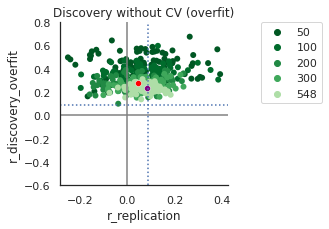

Replication probability at n = 50 : 12.631578947368421 %
Replication probability at n = 100 : 10.0 %
Replication probability at n = 200 : 25.252525252525253 %
Replication probability at n = 300 : 34.0 %
Replication probability at n = 548 : 65.0 %


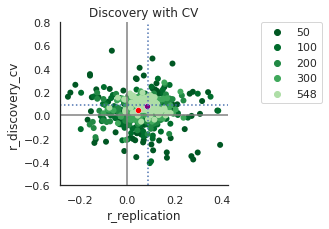

Replication probability at n = 50 : 0.0 %
Replication probability at n = 100 : 0.0 %
Replication probability at n = 200 : 50.0 %
Replication probability at n = 300 : 66.66666666666666 %
Replication probability at n = 548 : 56.09756097560976 %


{'r_rep_200': 0.04577939992501346, 'r_rep_max': 0.08150276169311586}

In [22]:
df = pd.read_csv('res/results_thck_PCA_SVR.csv')
plot(target='CogTotalComp_AgeAdj', feature='FS_CT', df=df, cv_only=False, filetag='PCA-SVR_ylim', ylim=(-0.6,0.8))

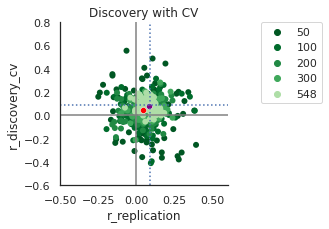

Replication probability at n = 50 : 0.0 %
Replication probability at n = 100 : 0.0 %
Replication probability at n = 200 : 50.0 %
Replication probability at n = 300 : 66.66666666666666 %
Replication probability at n = 548 : 56.09756097560976 %


{'r_rep_200': 0.04577939992501346, 'r_rep_max': 0.08150276169311586}

In [23]:
plot(target='CogTotalComp_AgeAdj', feature='FS_CT', df=df, cv_only=True, filetag='PCA-SVR', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Cognitive ability, Ridge

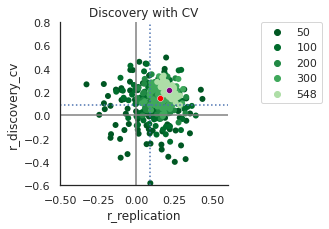

Replication probability at n = 50 : 4.761904761904762 %
Replication probability at n = 100 : 42.857142857142854 %
Replication probability at n = 200 : 79.66101694915254 %
Replication probability at n = 300 : 94.04761904761905 %
Replication probability at n = 548 : 100.0 %


{'r_rep_200': 0.15310648908028085, 'r_rep_max': 0.2153618683467791}

In [24]:
df = pd.read_csv('res/results_thck_Ridge.csv')
plot(target='CogTotalComp_AgeAdj', feature='FS_CT', df=df, filetag='Ridge', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Inflation histograms

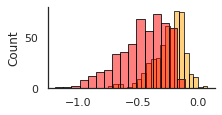

In [25]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('res/results_thck_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='FS_CT')]
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='orange', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='black',fill=False)


df = pd.read_csv('res/results_thck_Ridge.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='FS_CT')]
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='red', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='black',fill=False)
sns.despine()

plt.savefig('fig/ct_hist_inflation_overfit.pdf')
plt.show()

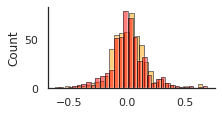

In [26]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('res/results_thck_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='FS_CT')]
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='orange', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='black',fill=False)


df = pd.read_csv('res/results_thck_Ridge.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='FS_CT')]
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='red', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='black',fill=False)
sns.despine()

plt.savefig('fig/ct_hist_inflation_cv.pdf')
plt.show()

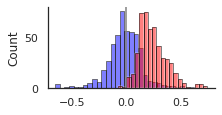

In [27]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('res/results_thck_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='FS_CT')]
sns.histplot(tmp.r_discovery_cv - tmp.r_replication, color='blue', alpha=0.5)
sns.histplot(tmp.r_discovery_cv - tmp.r_replication, color='black',fill=False)

tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='FS_CT')]
sns.histplot(tmp.r_discovery_overfit - tmp.r_replication, color='red', alpha=0.5)
sns.histplot(tmp.r_discovery_overfit - tmp.r_replication, color='black',fill=False)
sns.despine()

plt.axvline(0, color='gray')

plt.savefig('fig/ct_hist_inflation_cv_vs_overfit.pdf')
plt.show()

# False positives with biased and unbiased estimates
 Evaluated via a null model

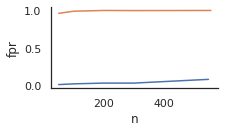

In [28]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")

df = pd.read_csv('res/results_thck_null_PCA_SVR.csv')
tmp = df[df.target == 'CogTotalComp_AgeAdj']

def fpr(x, alpha=0.05):
    return (x<alpha).sum()/len(x)

df_fpr = tmp.groupby('n')['p_discovery_cv'].agg([fpr])
sns.lineplot(x='n', y='fpr', data=df_fpr)
df_fpr = df.groupby('n')['p_discovery_overfit'].agg([fpr])
sns.lineplot(x='n', y='fpr', data=df_fpr)
sns.despine()

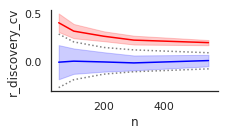

In [29]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")

df = pd.read_csv('res/results_thck_null_PCA_SVR.csv')
tmp = df[df.target == 'CogTotalComp_AgeAdj']

num_perm = 1000


# helper functions to compoute conf. intervals for correlation
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return (e - 1) / (e + 1)

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + alpha)/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se
    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

r_ci_lo = [r_confidence_interval(0, 0.95, n=n)[0] for n in df.n.unique()]
r_ci_hi = [r_confidence_interval(0, 0.95, n=n)[1] for n in df.n.unique()]

sns.lineplot(x='n', y='r_discovery_cv', data=tmp, ci='sd', color="blue")
sns.lineplot(x='n', y='r_discovery_overfit', data=tmp, ci='sd', color="red")
sns.lineplot(x=df.n.unique(), y=r_ci_lo, linestyle='dotted', color='gray')
sns.lineplot(x=df.n.unique(), y=r_ci_hi, linestyle='dotted', color='gray')
sns.despine()
plt.savefig('fig/ct_null_biased_vs_unbiased.pdf')

<AxesSubplot:xlabel='r_discovery_cv', ylabel='Count'>

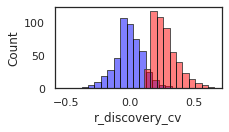

In [30]:
df = pd.read_csv('res/results_thck_null_PCA_SVR.csv')
tmp = df[df.target == 'CogTotalComp_AgeAdj']

binwidth = 0.05

sns.histplot(tmp.r_discovery_cv, color='blue', alpha=0.5, binwidth=binwidth)
sns.histplot(tmp.r_discovery_cv, color='black',fill=False, binwidth=binwidth)

sns.histplot(tmp.r_discovery_overfit, color='red', alpha=0.5, binwidth=binwidth)
sns.histplot(tmp.r_discovery_overfit, color='black',fill=False, binwidth=binwidth)

# Replication Probabilities

PCA-SVR

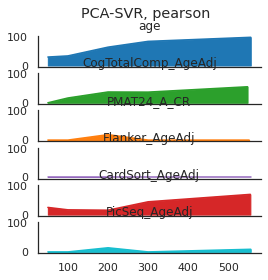

In [31]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'FS_CT'
model = "PCA_SVR"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, pearson')
    plt.savefig('fig/ct_replication_' + feature + '_' + model + '.pdf')

Ridge

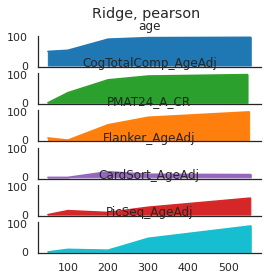

In [32]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'FS_CT'
model = "Ridge"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, pearson')
    plt.savefig('fig/ct_replication_' + feature + '_' + model + '.pdf')

# Multivariate Statistical Power

90.0
36.0
4.0
3.0
56.99999999999999
22.0


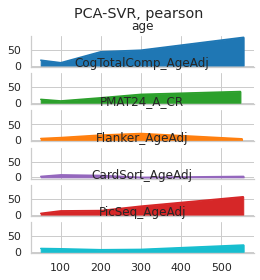

In [40]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'FS_CT'
model = "PCA_SVR"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100
            if n>400:
                print(power[i])

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, pearson')
    plt.savefig('fig/ct_power_' + feature + '_' + model + '.pdf')

100.0
99.0
99.0
30.0
57.99999999999999
63.0


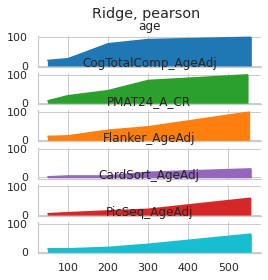

In [34]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'FS_CT'
model = "Ridge"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100
            if n>400:
                print(power[i])

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, pearson')
    plt.savefig('fig/ct_power_' + feature + '_' + model + '.pdf')

# Learning Curves

In [35]:
def plot_learning_curve(target, feature, df, filetag=None):
    sns.set(rc={"figure.figsize":(3, 2)})
    sns.set_style("white")
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]

    sns.lineplot(x='n', y='r_discovery_cv', data=tmp, ci="sd")
    sns.lineplot(x='n', y='r_discovery_overfit', data=tmp, ci="sd")
    sns.lineplot(x='n', y='r_replication', data=tmp, ci="sd")
    plt.ylim((-0.2, 1.01))
    sns.despine()
    if filetag:
        plt.savefig('fig/ct_learning_curve_' + target + '_' + feature + '_' + filetag + '.pdf')

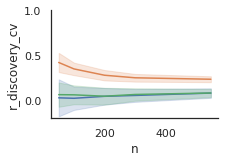

In [36]:
df = pd.read_csv('res/results_thck_PCA_SVR.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='FS_CT', df=df, filetag='pca-svr')

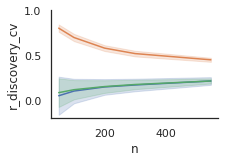

In [37]:
df = pd.read_csv('res/results_thck_Ridge.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='FS_CT', df=df, filetag='ridge')

In [41]:
# replicability, power, pub. bias

In [68]:
sample_size_needed = []
variable = []
method = []

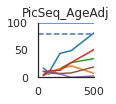

In [69]:
import numpy as np
sns.set(rc={"figure.figsize":(1, 1)})
sns.set_style("white")
# Replicability of:
model = "PCA_SVR"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target)]
    tmp_null = df_null.loc[(df_null.target==target)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100
            if power[i] >= 80 and n_req == 600:
                n_req = n

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target]).set(title=target)
sns.despine()
plt.axhline(80, linestyle = 'dashed')
plt.axhline(100)
plt.xlim(0,500)
plt.ylim(0,100)
plt.savefig('fig/power_CT_' + feature + '_' + model + '.pdf')



### Power: Partial corr + Ridge

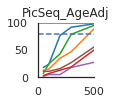

In [70]:
import numpy as np
sns.set(rc={"figure.figsize":(1, 1)})
sns.set_style("white")
# Replicability of:
model = "Ridge"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target)]
    tmp_null = df_null.loc[(df_null.target==target)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100
            if power[i] >= 80 and n_req == 600:
                n_req = n

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target]).set(title=target)
sns.despine()
plt.axhline(80, linestyle = 'dashed')
plt.axhline(100)
plt.xlim(0,500)
plt.ylim(0,100)
plt.savefig('fig/power_CT_' + feature + '_' + model + '.pdf')



,sample size needed,target,method
0,556,age,FS_CT_PCA_SVR
1,600,CogTotalComp_AgeAdj,FS_CT_PCA_SVR
2,600,PMAT24_A_CR,FS_CT_PCA_SVR
3,600,Flanker_AgeAdj,FS_CT_PCA_SVR
4,600,CardSort_AgeAdj,FS_CT_PCA_SVR
5,600,PicSeq_AgeAdj,FS_CT_PCA_SVR
6,300,age,FS_CT_Ridge
7,548,CogTotalComp_AgeAdj,FS_CT_Ridge
8,552,PMAT24_A_CR,FS_CT_Ridge
9,600,Flanker_AgeAdj,FS_CT_Ridge


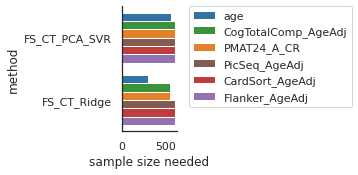

In [71]:
sns.set(rc={"figure.figsize":(1, 2.3)})
sns.set_style("white")

bar_df = pd.DataFrame(
    {
        'sample size needed': sample_size_needed,
        'target': variable,
        'method' : method
    }
)

palette = {
    'age' : 'tab:blue',
    'CogTotalComp_AgeAdj' : 'tab:green',
    'PMAT24_A_CR' : 'tab:orange',
    'Flanker_AgeAdj' : 'tab:purple',
    'CardSort_AgeAdj' : 'tab:red',
    'PicSeq_AgeAdj' : 'tab:brown'
}

sns.barplot(x='sample size needed', y='method', hue='target', data=bar_df, palette=palette, ci=None,
            hue_order = ['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj'])
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('fig/power_bar_all_CT.pdf')
bar_df

### Replication: Pearson + PCA-SVR

In [72]:
sample_size_needed = []
variable = []
method = []

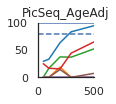

In [73]:
import numpy as np
sns.set(rc={"figure.figsize":(1, 1)})
sns.set_style("white")
# Replicability of:
model = "PCA_SVR"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target)]
    tmp_null = df_null.loc[(df_null.target==target)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100

            if replication_prob[i] >= 80 and n_req == 600:
                n_req = n

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target]).set(title=target)
sns.despine()
plt.axhline(80, linestyle = 'dashed')
plt.axhline(100)
plt.xlim(0,500)
plt.ylim(0,100)
plt.savefig('fig/replication_CT_' + feature + '_' + model + '.pdf')

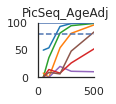

In [74]:
import numpy as np
sns.set(rc={"figure.figsize":(1, 1)})
sns.set_style("white")
# Replicability of:
model = "Ridge"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target)]
    tmp_null = df_null.loc[(df_null.target==target)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100

            if replication_prob[i] >= 80 and n_req == 600:
                n_req = n

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target]).set(title=target)
sns.despine()
plt.axhline(80, linestyle = 'dashed')
plt.axhline(100)
plt.xlim(0,500)
plt.ylim(0,100)
plt.savefig('fig/replication_CT_' + feature + '_' + model + '.pdf')

,sample size needed,target,method
0,300,age,FS_CT_PCA_SVR
1,300,age,FS_CT_PCA_SVR
2,600,CogTotalComp_AgeAdj,FS_CT_PCA_SVR
3,600,CogTotalComp_AgeAdj,FS_CT_PCA_SVR
4,600,PMAT24_A_CR,FS_CT_PCA_SVR
5,600,PMAT24_A_CR,FS_CT_PCA_SVR
6,600,Flanker_AgeAdj,FS_CT_PCA_SVR
7,600,Flanker_AgeAdj,FS_CT_PCA_SVR
8,600,CardSort_AgeAdj,FS_CT_PCA_SVR
9,600,CardSort_AgeAdj,FS_CT_PCA_SVR


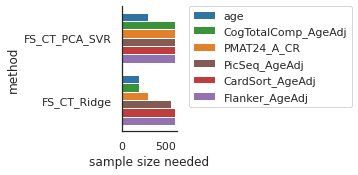

In [75]:
sns.set(rc={"figure.figsize":(1, 2.3)})
sns.set_style("white")

bar_df = pd.DataFrame(
    {
        'sample size needed': sample_size_needed,
        'target': variable,
        'method' : method
    }
)

palette = {
    'age' : 'tab:blue',
    'CogTotalComp_AgeAdj' : 'tab:green',
    'PMAT24_A_CR' : 'tab:orange',
    'Flanker_AgeAdj' : 'tab:purple',
    'CardSort_AgeAdj' : 'tab:red',
    'PicSeq_AgeAdj' : 'tab:brown'
}

sns.barplot(x='sample size needed', y='method', hue='target', data=bar_df, palette=palette, ci=None,
            hue_order = ['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj'])
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('fig/replication_bar_all_CT.pdf')
bar_df

# True inflation

In [76]:
sample_size_needed = []
variable = []
method = []

age 50 1.1780906033402156
age 100 1.9327582639969616
age 200 0.5138009906429949
age 300 0.3421449969744994
age 556 0.04097392257252088
!
* age 556
CogTotalComp_AgeAdj 50 224.281749811531
CogTotalComp_AgeAdj 100 2.020879152028827
CogTotalComp_AgeAdj 200 1.6224603127283106
CogTotalComp_AgeAdj 300 0.7469723114509935
CogTotalComp_AgeAdj 548 1.0546368587208466
* CogTotalComp_AgeAdj 600
PMAT24_A_CR 50 4.253945467118467
PMAT24_A_CR 100 27.567197019475213
PMAT24_A_CR 200 4.098433870888929
PMAT24_A_CR 300 59.07398716762459
PMAT24_A_CR 552 -7.0989668516175435
* PMAT24_A_CR 600
Flanker_AgeAdj 50 -6.0969894811198735
Flanker_AgeAdj 100 -8.12022500210753
Flanker_AgeAdj 200 20.002142820725137
Flanker_AgeAdj 556 -2.659122618023237
* Flanker_AgeAdj 600
CardSort_AgeAdj 50 3.9324663093148655
CardSort_AgeAdj 100 3.093295974207094
CardSort_AgeAdj 200 3.3089586931393304
CardSort_AgeAdj 300 1.0148790163770511
CardSort_AgeAdj 555 0.2744634592969044
* CardSort_AgeAdj 600
PicSeq_AgeAdj 50 -17.31595150300168
Pic

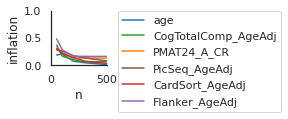

In [77]:
import numpy as np
sns.set(rc={"figure.figsize":(1, 1)})
sns.set_style("white")
# Replicability of:
model = "PCA_SVR"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

r1 = []
r2 = []
targets = []
ns = []

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target)]
    tmp_null = df_null.loc[(df_null.target==target)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            num = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum()
            if num > 0:

                _r1 = tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold, 'r_discovery_cv'].values.tolist()
                _r2 = tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold, 'r_replication'].values.tolist()

                r1 += _r1
                r2 += _r2
                ns += [n]*num
                targets += [target]*num

                # less than 10% inflation
                print(target, n, np.mean(np.array(_r1)-np.array(_r2))/np.mean(_r2) )
                if 0 < np.mean(np.array(_r1)-np.array(_r2))/np.mean(_r2) < 0.20 and n_req == 600:
                    print('!')
                    n_req = n

    print('*', target, n_req)
    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

inf_df = pd.DataFrame({
    'r_discovery': r1,
    'r_replication': r2,
    'inflation' : np.array(r1)-np.array(r2),
    'n': ns,
    'target': targets
})

inf_df.groupby(['target', 'n'])

sns.lineplot(x='n', y='inflation', data=inf_df, hue="target", palette=palette, ci=None,
             hue_order=['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj'])
plt.xlim(0,500)
plt.ylim(0,1)
sns.despine()
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.savefig('fig/inflation_CT_' + feature + '_' + model + '.pdf')

age 50 0.7759288298125752
age 100 0.8842603219944344
age 200 0.13601245038730278
!
age 300 0.024977141811838327
age 556 -0.06494881459502844
* age 200
CogTotalComp_AgeAdj 50 4.095908462420322
CogTotalComp_AgeAdj 100 2.0215389513764017
CogTotalComp_AgeAdj 200 0.473564139520438
CogTotalComp_AgeAdj 300 0.09692041286986189
!
CogTotalComp_AgeAdj 548 0.008567007962622513
* CogTotalComp_AgeAdj 300
PMAT24_A_CR 50 3.0428855998682915
PMAT24_A_CR 100 5.058054198559598
PMAT24_A_CR 200 0.8006444053141555
PMAT24_A_CR 300 0.4777504721041119
PMAT24_A_CR 552 0.039446569604439756
!
* PMAT24_A_CR 552
Flanker_AgeAdj 50 47.45435016148013
Flanker_AgeAdj 100 -12.49540373572046
Flanker_AgeAdj 200 -2088.624779540591
Flanker_AgeAdj 300 2.8030673662548082
Flanker_AgeAdj 556 1.9512706721680946
* Flanker_AgeAdj 600
CardSort_AgeAdj 50 14.472324468787441
CardSort_AgeAdj 100 3.075246657624449
CardSort_AgeAdj 200 4.742249425125465
CardSort_AgeAdj 300 1.6968948655650309
CardSort_AgeAdj 555 0.7357066258032654
* CardSort

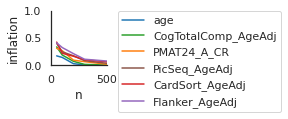

In [78]:
import numpy as np
sns.set(rc={"figure.figsize":(1, 1)})
sns.set_style("white")
# Replicability of:
model = "Ridge"
df = pd.read_csv('res/results_thck_' + model + '.csv')
df_null = pd.read_csv('res/results_thck_null_' + model + '.csv')

r1 = []
r2 = []
targets = []
ns = []

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target)]
    tmp_null = df_null.loc[(df_null.target==target)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            num = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum()
            if num > 0:

                _r1 = tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold, 'r_discovery_cv'].values.tolist()
                _r2 = tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold, 'r_replication'].values.tolist()

                r1 += _r1
                r2 += _r2
                ns += [n]*num
                targets += [target]*num

                # less than 10% inflation
                print(target, n, np.mean(np.array(_r1)-np.array(_r2))/np.mean(_r2) )
                if 0 < np.mean(np.array(_r1)-np.array(_r2))/np.mean(_r2) < 0.20 and n_req == 600:
                    print('!')
                    n_req = n

    print('*', target, n_req)
    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

inf_df = pd.DataFrame({
    'r_discovery': r1,
    'r_replication': r2,
    'inflation' : np.array(r1)-np.array(r2),
    'n': ns,
    'target': targets
})

inf_df.groupby(['target', 'n'])

sns.lineplot(x='n', y='inflation', data=inf_df, hue="target", palette=palette, ci=None,
             hue_order=['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj'])
plt.xlim(0,500)
plt.ylim(0,1)
sns.despine()
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.savefig('fig/inflation_CT_' + feature + '_' + model + '.pdf')

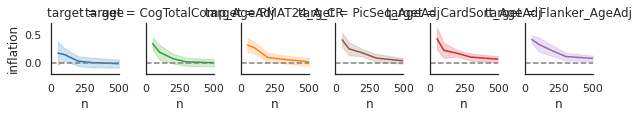

In [79]:
sns.set_style("white")

palette = {
    'age' : 'tab:blue',
    'CogTotalComp_AgeAdj' : 'tab:green',
    'PMAT24_A_CR' : 'tab:orange',
    'Flanker_AgeAdj' : 'tab:purple',
    'CardSort_AgeAdj' : 'tab:red',
    'PicSeq_AgeAdj' : 'tab:brown'
}

g = sns.FacetGrid(inf_df, col="target", hue="target", xlim=(0,500), ylim=(-0.2, 0.7), height=1.8, aspect=0.8, palette=palette,
                  col_order=['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj'])
g.map(sns.lineplot, 'n', 'inflation', ci='sd')
g.refline(y=0)
plt.savefig('fig/true_inflation_all_' + feature + '_' + model + '.pdf')

,sample size needed,target,method
0,556,age,FS_CT_PCA_SVR
1,600,CogTotalComp_AgeAdj,FS_CT_PCA_SVR
2,600,PMAT24_A_CR,FS_CT_PCA_SVR
3,600,Flanker_AgeAdj,FS_CT_PCA_SVR
4,600,CardSort_AgeAdj,FS_CT_PCA_SVR
5,600,PicSeq_AgeAdj,FS_CT_PCA_SVR
6,200,age,FS_CT_Ridge
7,300,CogTotalComp_AgeAdj,FS_CT_Ridge
8,552,PMAT24_A_CR,FS_CT_Ridge
9,600,Flanker_AgeAdj,FS_CT_Ridge


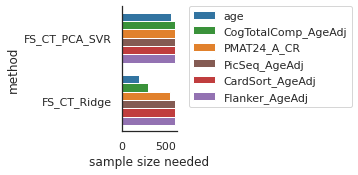

In [80]:
sns.set(rc={"figure.figsize":(1, 2.3)})
sns.set_style("white")

bar_df = pd.DataFrame(
    {
        'sample size needed': sample_size_needed,
        'target': variable,
        'method' : method
    }
)

palette = {
    'age' : 'tab:blue',
    'CogTotalComp_AgeAdj' : 'tab:green',
    'PMAT24_A_CR' : 'tab:orange',
    'Flanker_AgeAdj' : 'tab:purple',
    'CardSort_AgeAdj' : 'tab:red',
    'PicSeq_AgeAdj' : 'tab:brown'
}

sns.barplot(x='sample size needed', y='method', hue='target', data=bar_df, palette=palette, ci=None,
            hue_order = ['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj'])
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('fig/inflation_bar_all_CT.pdf')
bar_df